# Numerical Computing: Homework 4

* Linear algebra with Python


###### Authors:

* alberto.suarez@uam.es
* Student 1:
* Student 2:


#### Instructions

* The code should follow 
    * PEP 20 – The Zen of Python. https://peps.python.org/pep-0020    
    * PEP 8 – Style Guide for Python Code. <https://peps.python.org/pep-0008>
    * PEP 257 – Docstring Conventions. https://peps.python.org/pep-0257
    * Type hints. https://docs.python.org/3/library/typing.html
    * Mypy. https://mypy.readthedocs.io/en/stable/cheat_sheet_py3.html
    * Google Python sytle guide. https://google.github.io/styleguide/pyguide.html  

* Please use Markdown [https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet] cells with formulas in latex for the derivations. Alternatively, insert a scanned image of the derivations, as it is here done with the Alan Turing [https://www.turing.org.uk/] picture.


![alt text](alan-turing.jpg "Alan Turing")

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation


from scipy.stats import multivariate_normal
from numpy.typing import NDArray, ArrayLike
from matplotlib import cm
from IPython.display import display, Latex

from numerical_computing_HW_004_linear_algebra_2024_10_06 import *

"""
from numerical_computing_HW_004_linear_algebra_2024_10_06 import (
    multivariate_normal_pdf, 
    rotation_matrix_2D, 
    remove_sign_eigenvectors,
    make_data_matrix,
    linear_fit,
)
"""
%matplotlib notebook
%load_ext autoreload
%autoreload 2

### Generation of synthetic regression problem

<IPython.core.display.Javascript object>


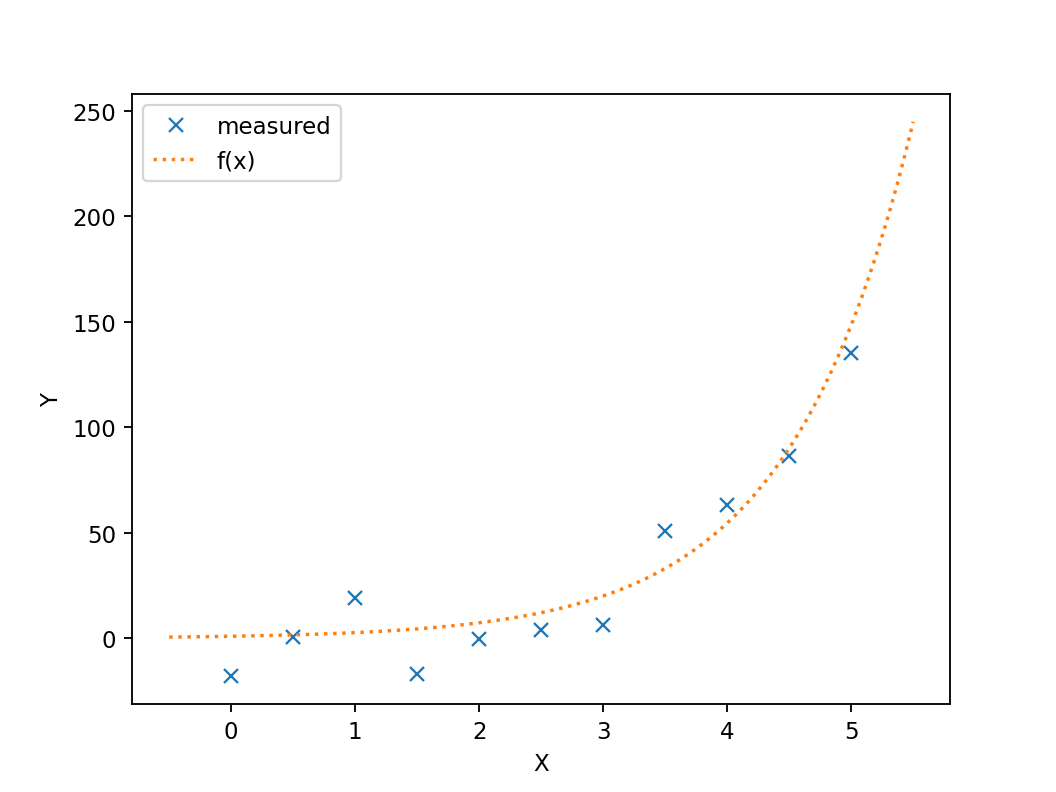

In [2]:
f = np.exp 

x_low, x_up = 0.0, 5.0

n_train = 11
x_train = np.linspace(x_low, x_up, num=n_train)                                                                                                  
rng = np.random.default_rng(seed=8123)
y_train = f(x_train) 
noise_level = 0.5 * np.mean(np.abs(y_train))
y_train += noise_level * rng.standard_normal(np.size(x_train))


n_test = 100
slack = 0.1
delta_x = x_up - x_low
x_test = np.linspace(x_low - slack*delta_x, x_up + slack*delta_x, num=n_test)                                                                                                  
y_test_true = f(x_test)

fig, ax = plt.subplots()
ax.plot(x_train, y_train,'x', label='measured')
ax.plot(x_test, y_test_true, ':', label='f(x)')
ax.set(xlabel='X', ylabel='Y')
_ = ax.legend()


###  Linear and regularized linear regression


<IPython.core.display.Javascript object>


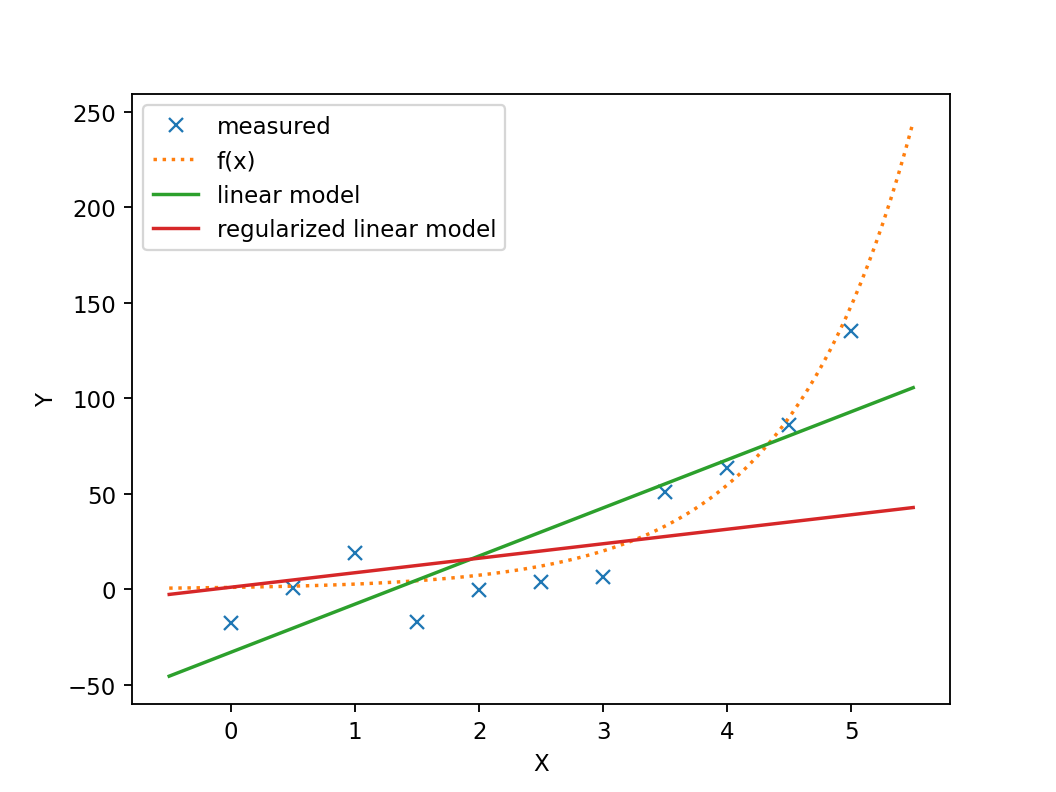

In [3]:
_, dimension, X_test = make_data_matrix(
    x_test,
    include_bias=True
)

beta = linear_fit(x_train, y_train) 
y_test_pred = X_test @ beta

beta_regularized = linear_fit(x_train, y_train, regularization_rate=100.0)

y_test_pred_regularized = X_test @ beta_regularized

fig, ax = plt.subplots()
ax.plot(x_train, y_train,'x', label='measured')
ax.plot(x_test, y_test_true, ':', label='f(x)')
ax.plot(x_test, y_test_pred, '', label='linear model')
ax.plot(x_test, y_test_pred_regularized, '', label='regularized linear model')
ax.set(xlabel='X', ylabel='Y')
_ = ax.legend()


<IPython.core.display.Javascript object>


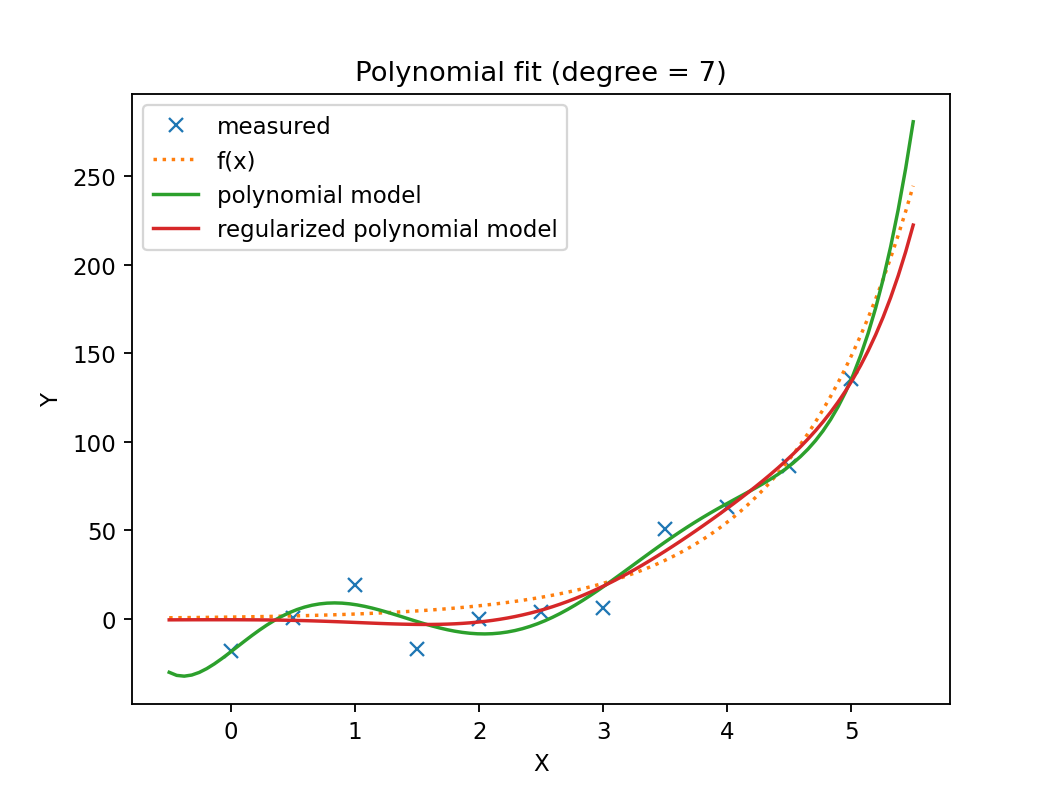

In [4]:
degree = 7
X_embedded = polynomial_features(
    np.hstack((x_train, x_test)),
    degree, 
    include_bias=True
)

X_train_embedded = X_embedded[:n_train, :] 
X_test_embedded = X_embedded[n_train:, :] 

beta = linear_fit(X_train_embedded, y_train, fit_intercept=False) 
y_test_pred = X_test_embedded @ beta


beta_regularized = linear_fit(
    X_train_embedded, 
    y_train, 
    regularization_rate=20.0,
    fit_intercept=False
)

y_test_pred_regularized = X_test_embedded @ beta_regularized

fig, ax = plt.subplots()
ax.plot(x_train, y_train,'x', label='measured')
ax.plot(x_test, y_test_true, ':', label='f(x)')
ax.plot(x_test, y_test_pred, '', label='polynomial model')
ax.plot(x_test, y_test_pred_regularized, '', label='regularized polynomial model')
ax.set(xlabel='X', ylabel='Y', title='Polynomial fit (degree = {:d})'.format(degree))

_ = ax.legend()


<IPython.core.display.Javascript object>


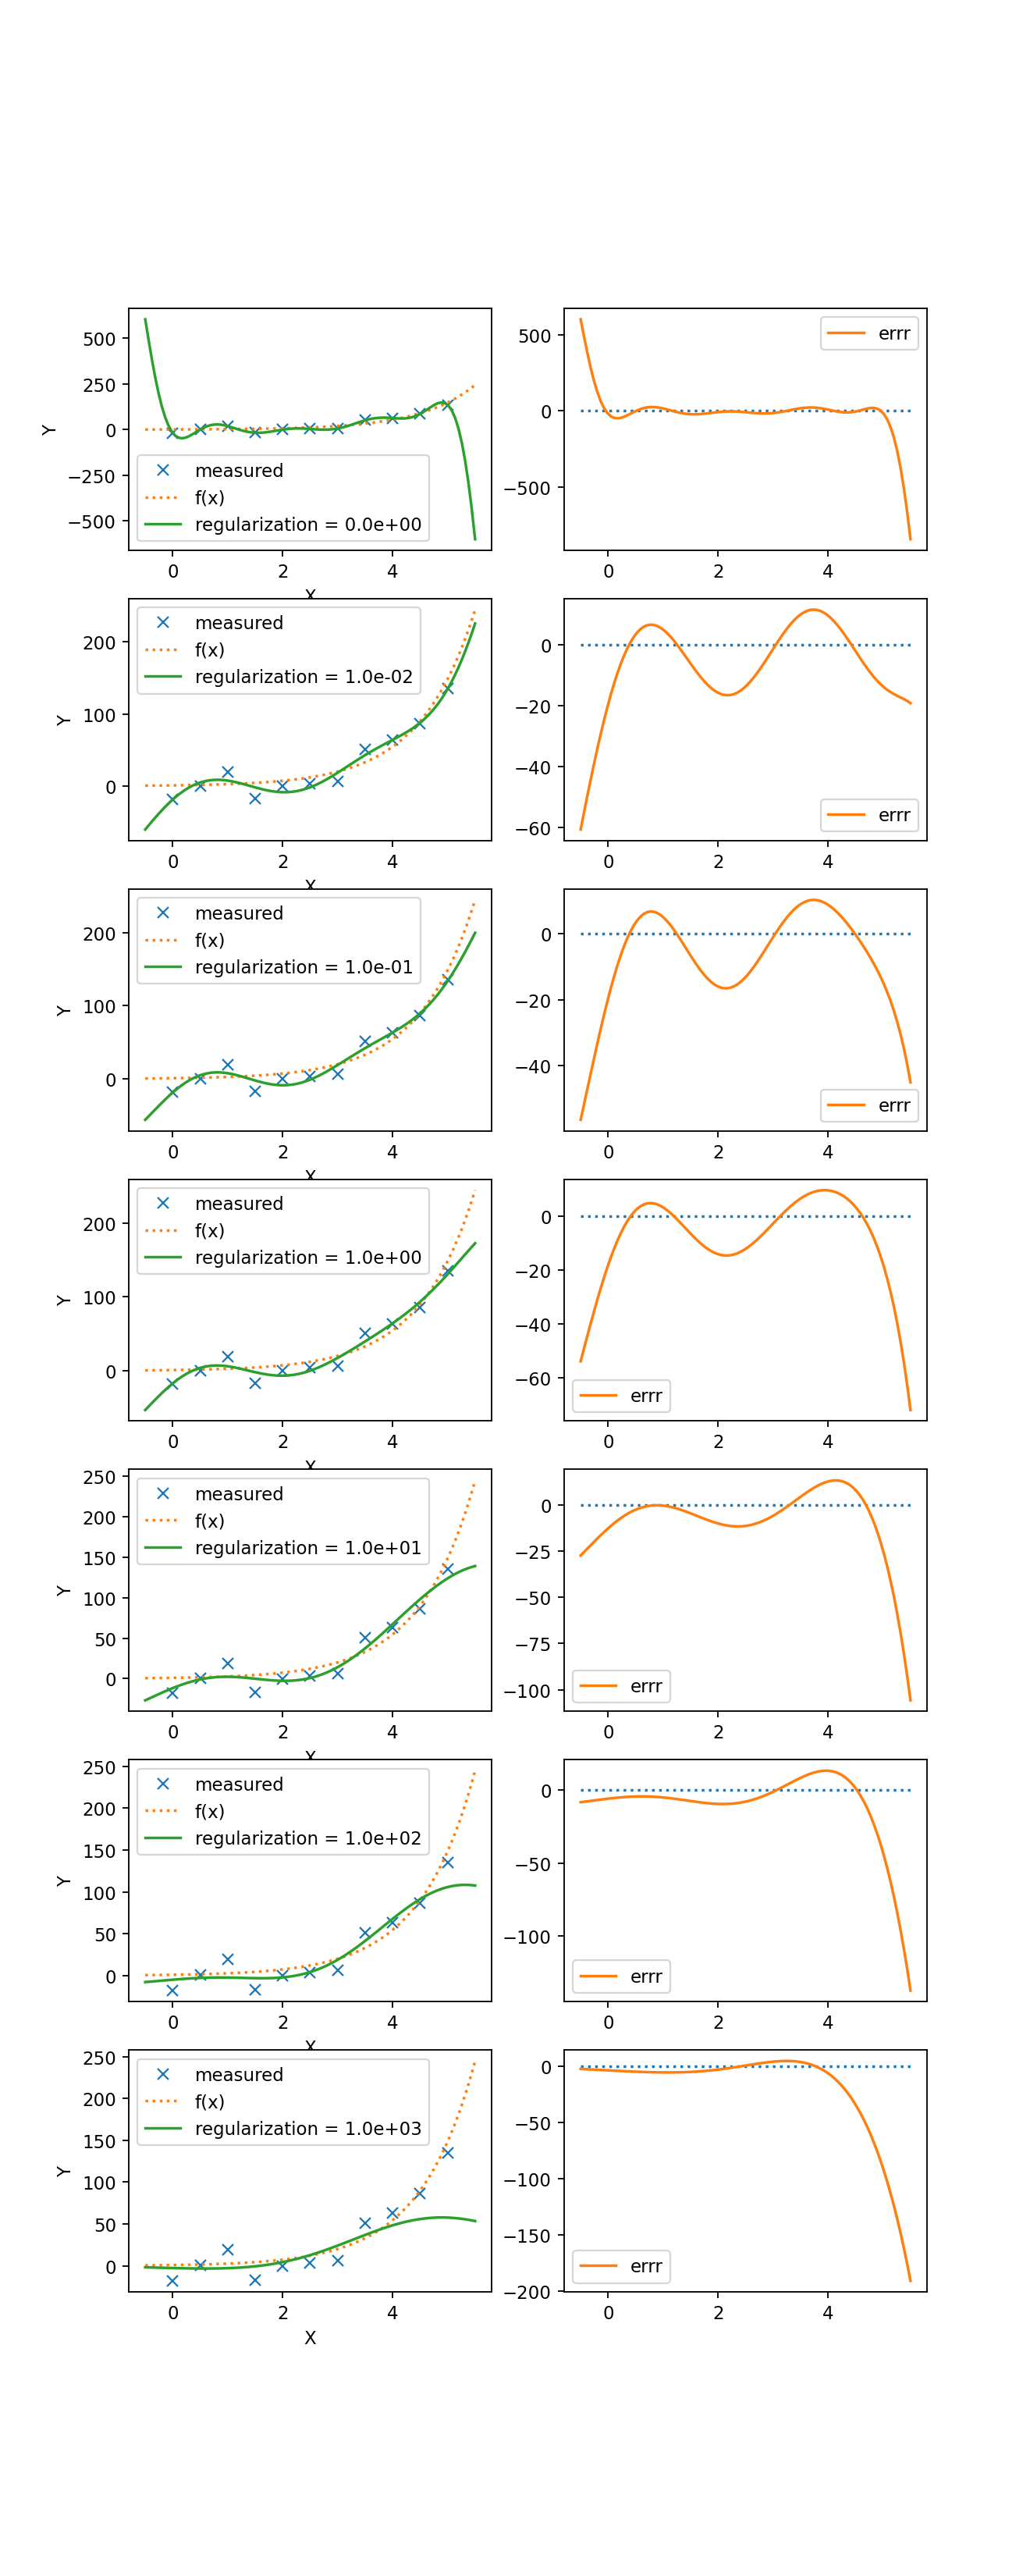

In [5]:
n_features = 1000
scale = 0.1
include_bias=True 

X_embedded = random_Fourier_features(
    np.hstack((x_train, x_test)),
    n_features,
    np.random.default_rng(seed=123).standard_normal,
    scale, 
    include_bias
)

X_train_embedded = X_embedded[:n_train, :] 
X_test_embedded = X_embedded[n_train:, :] 

regularization_rates = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

fig, axs = plt.subplots(
    len(regularization_rates), 
    2,
    figsize=(8, 20)
)

for i, regularization_rate in enumerate(regularization_rates):
    beta_regularized = linear_fit(
        X_train_embedded, 
        y_train, 
        regularization_rate,
        fit_intercept=False
    )
    y_test_pred_regularized = X_test_embedded @ beta_regularized

    axs[i, 0].plot(x_train, y_train,'x', label='measured')
    axs[i, 0].plot(x_test, y_test_true, ':', label='f(x)')
    axs[i, 0].plot(
        x_test, 
        y_test_pred_regularized,
        label='regularization = {:.1e}'.format(regularization_rate)
    )
    axs[i, 0].set(xlabel='X', ylabel='Y')
    axs[i, 0].legend()    
    
    axs[i, 1].plot(x_test, np.zeros_like(x_test), ':')
    axs[i, 1].plot(x_test, y_test_pred_regularized - y_test_true, label='errr')
    axs[i, 1].legend()    
    


# Diagonalization of a matrix

In [6]:
A = np.array(
    [[2.0, -1.0], 
     [5.0, -7.0]]
)

eigenvalues, eigenvectors = np.linalg.eig(A) 

Lambda = np.diag(eigenvalues)

print('Matrix')
print(A)

print('\nVector of eigenvalues')
print(eigenvalues)

print('\nMatrix of eigenvalues')
print(Lambda)


print('\nDiagonalization (similarity transformation):')
print(np.linalg.inv(eigenvectors) @ A @ eigenvectors)

print('\nThe original matrix can be recovered using the inverse of the similarity transformation:')
print(eigenvectors @ Lambda @ np.linalg.inv(eigenvectors))


Matrix
[[ 2. -1.]
 [ 5. -7.]]

Vector of eigenvalues
[ 1.40512484 -6.40512484]

Matrix of eigenvalues
[[ 1.40512484  0.        ]
 [ 0.         -6.40512484]]

Diagonalization (similarity transformation):
[[ 1.40512484e+00 -1.38777878e-16]
 [-4.44089210e-16 -6.40512484e+00]]

The original matrix can be recovered using the inverse of the similarity transformation:
[[ 2. -1.]
 [ 5. -7.]]


### Properties of the eigenvectors

In [7]:
print('\nMatrix of eigenvectors (eigenvectors by columns):')
print(eigenvectors)

print('\nThe eigenvectors are normalized')
print(np.sum(eigenvectors**2, axis=0))

print('\nThe eigenvectors are not necessarily orthogonal')
print(eigenvectors[:, 0].T @ eigenvectors[:, 1])

print('\nThe eigenvectors are invariant to a sign change:')
eigenvectors *= - np.ones_like(eigenvectors)
print(eigenvectors)

print('\nDiagonalization (similarity transformation):')
print(np.linalg.inv(eigenvectors) @ A @ eigenvectors)

print('\nThe original matrix can be recovered using the inverse of the similarity transformation:')
print(eigenvectors @ Lambda @ np.linalg.inv(eigenvectors))

print(
    '\nIt is customary to choose the sign so that '      
    + 'the first non-zero element of each eigenvector is positive'
)
eigenvectors = remove_sign_column_vectors(eigenvectors)
print(eigenvectors)



Matrix of eigenvectors (eigenvectors by columns):
[[0.85942994 0.11814182]
 [0.51125353 0.99299673]]

The eigenvectors are normalized
[1. 1.]

The eigenvectors are not necessarily orthogonal
0.6092076990801716

The eigenvectors are invariant to a sign change:
[[-0.85942994 -0.11814182]
 [-0.51125353 -0.99299673]]

Diagonalization (similarity transformation):
[[ 1.40512484e+00 -1.38777878e-16]
 [-4.44089210e-16 -6.40512484e+00]]

The original matrix can be recovered using the inverse of the similarity transformation:
[[ 2. -1.]
 [ 5. -7.]]

It is customary to choose the sign so that the first non-zero element of each eigenvector is positive
[[0.85942994 0.11814182]
 [0.51125353 0.99299673]]


<IPython.core.display.Javascript object>


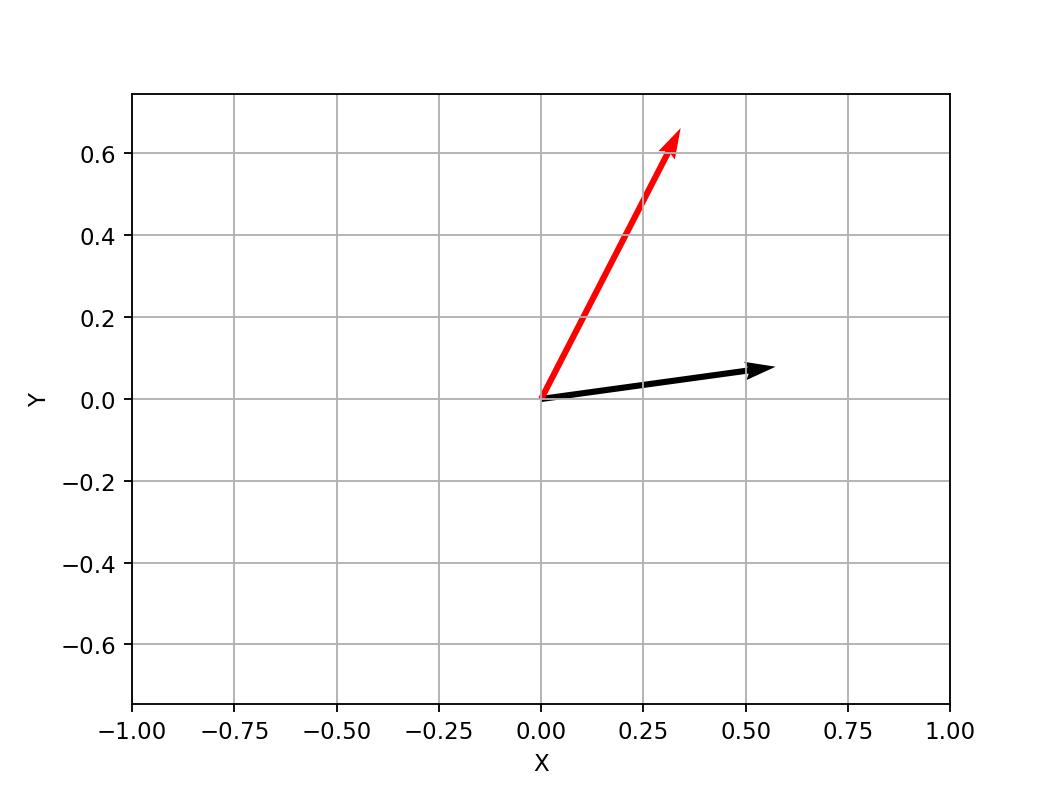

In [8]:
fig, ax = plt.subplots()

origin_point = np.zeros((2, 2))

lines = ax.quiver(
    *origin_point,
    *(eigenvectors.T),
    color=['k', 'r'],
    scale_units='x', 
    scale=1.5,
)

_ = ax.axis('equal')
_ = ax.grid()

_ = ax.set(
    xlim=(-1.0, 1.0), 
    ylim=(-1.0, 1.0),
    xlabel='X', ylabel='Y'
)

# Multivariate Gaussian distribution

In [9]:
mu = np.array([-1.0, 5.0])

sigma_x = 2.5
sigma_y = 3.0
rho = -0.6

Sigma = np.array(
    [[sigma_x ** 2, rho * sigma_x * sigma_y],
     [rho * sigma_x * sigma_y, sigma_y**2]]
)

X = np.array(
    [[-1.0, 5.0],
     [ 2.0, 0.0],
     [-5.0, 1.0]]
)

print(multivariate_normal_pdf(X, mu, Sigma)) # Our implementation (used here only for illustration)
print(multivariate_normal.pdf(X, mu, Sigma)) # Scipy implementation (recommened)

[0.02652582 0.00641077 0.00012114]
[0.02652582 0.00641077 0.00012114]


<IPython.core.display.Javascript object>


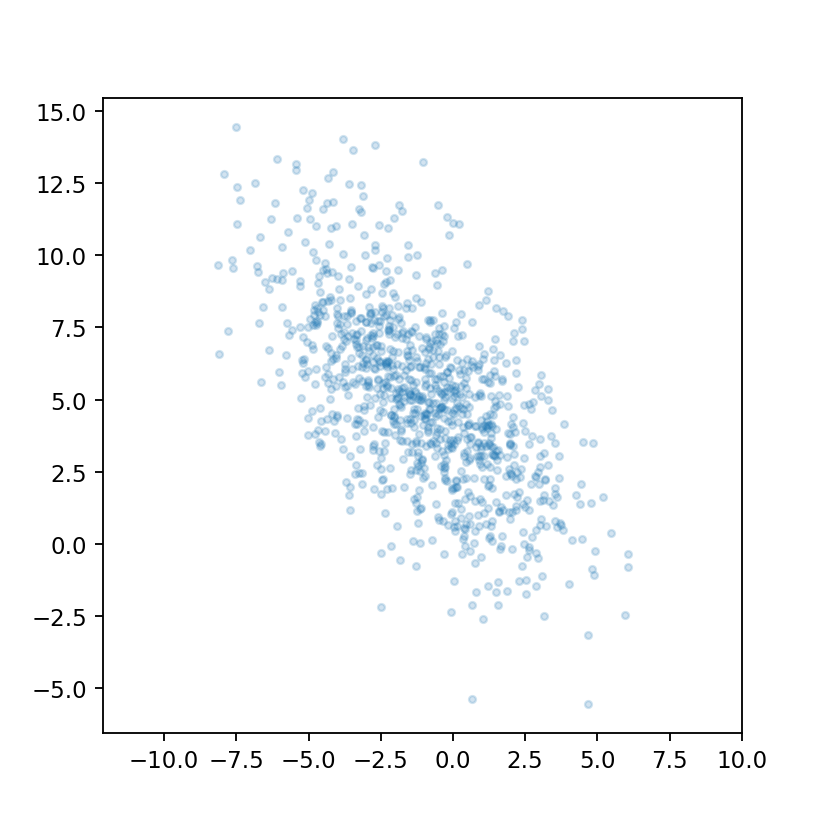

In [10]:
rng = np.random.default_rng()
X_rnd, Y_rnd = rng.multivariate_normal(mu, Sigma, 1000).T
fig, ax = plt.subplots(figsize=(5, 5))
_ = ax.plot(X_rnd, Y_rnd, 'o', alpha = 0.2, markersize=3)
_ = ax.axis('equal')


<IPython.core.display.Javascript object>


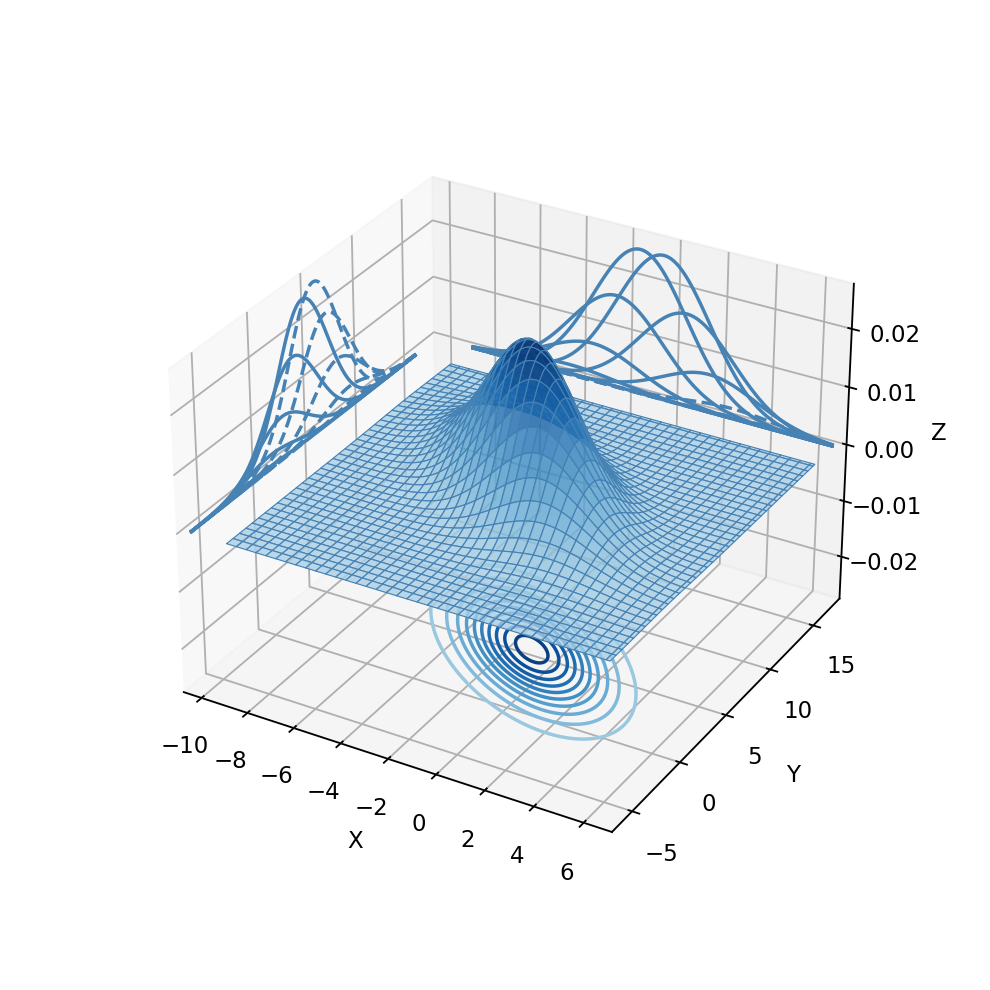

In [11]:
n_plot = 300
slack = 0.05
x_min, x_max = np.min(X_rnd), np.max(X_rnd)
x_range = x_max - x_min
x_min = x_min - slack * x_range
x_max = x_max + slack * x_range

y_min, y_max = np.min(Y_rnd), np.max(Y_rnd)
y_range = y_max - y_min
y_min = y_min - slack * y_range
y_max = y_max + slack * y_range

x_plot = np.linspace(x_min, x_max, n_plot)  
y_plot = np.linspace(y_min, y_max, n_plot)  


X_plot, Y_plot = np.meshgrid(x_plot, y_plot)
shape_X_plot = np.shape(X_plot)
Z_plot = multivariate_normal_pdf(
    np.column_stack((np.ravel(X_plot), np.ravel(Y_plot))),
    mu, 
    Sigma
) 
Z_plot = np.reshape(Z_plot, shape_X_plot)
z_max = Z_plot.max()
z_min = -z_max 
color_intensity_min = -z_max / 2
color = 'steelblue'

ax = plt.figure(figsize=(6, 6)).add_subplot(projection='3d')
ax.plot_surface(
    X_plot, 
    Y_plot, 
    Z_plot, 
    edgecolor=color,
    cmap=cm.Blues,
    vmin=color_intensity_min,
    lw=0.5, 
    rstride=8, 
    cstride=8,
    alpha=0.8
)

# Plot projections of the contours for each dimension.  By choosing offsets
# that match the appropriate axes limits, the projected contours will sit on
# the 'walls' of the graph.
n_levels = 10
offset_x = x_min - 0.1*(x_max - x_min)
ax.contour(X_plot, Y_plot, Z_plot, zdir='x', levels=n_levels, offset=offset_x, colors=color)
offset_y = y_max + 0.1*(y_max - y_min)
ax.contour(X_plot, Y_plot, Z_plot, zdir='y', levels=n_levels, offset=offset_y, colors=color)
ax.contour(X_plot, Y_plot, Z_plot, zdir='z', levels=n_levels, offset=z_min, cmap='Blues', vmin=color_intensity_min)

ax.set(xlim=(offset_x, x_max), 
       ylim=(y_min, offset_y), 
       zlim=(z_min, z_max),
       xlabel='X', ylabel='Y', zlabel='Z')

plt.show()


<IPython.core.display.Javascript object>


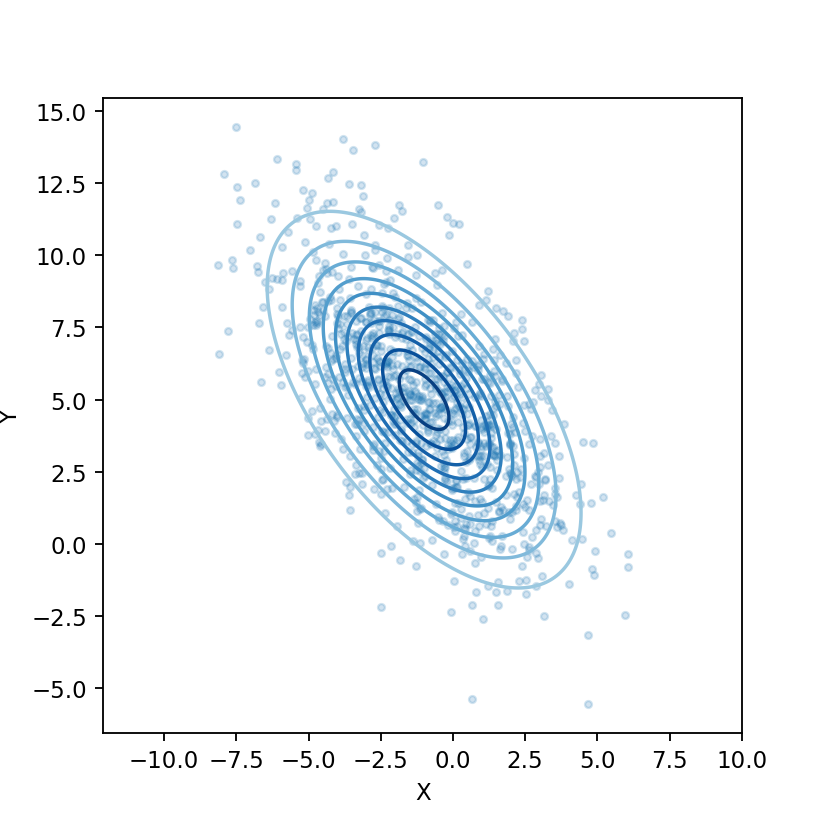

In [12]:
fig, ax = plt.subplots(figsize=(5, 5))
_ = ax.plot(X_rnd, Y_rnd, '.', alpha=0.2)
_ = ax.axis('equal')
ax.contour(X_plot, Y_plot, Z_plot, cmap='Blues', levels=n_levels, vmin=color_intensity_min)
ax.set(
    xlim=(x_min, x_max), 
    ylim=(y_min, y_max),
    xlabel='X', ylabel='Y'
)

_ = plt.plot()


### Diagonalization of a symmetric matrix

    

In [13]:

# when matrix is symmetric (real) or Hermitian (complex)
# `np.linalg.eigh` is preferable to `np.linalg.eig` 
eigenvalues, eigenvectors = np.linalg.eigh(Sigma) 
Lambda = np.diag(eigenvalues)

print('Covariance matrix')
print(np.asarray(Sigma))

print('\nVctor of eigenvalues')
print(eigenvalues)

print('\nMatrix of eigenvalues')
print(Lambda)

print('\nMatrix of eigenvectors (eigenvectors by columns):')
print(eigenvectors)

print('\nDiagonalization (similarity transformation):')
print(np.linalg.inv(eigenvectors) @ Sigma @ eigenvectors)

print('\nThe original matrix can be recovered using the inverse of the similarity transformation:')
print(eigenvectors @ Lambda @ np.linalg.inv(eigenvectors))


Covariance matrix
[[ 6.25 -4.5 ]
 [-4.5   9.  ]]

Vctor of eigenvalues
[ 2.91961744 12.33038256]

Matrix of eigenvalues
[[ 2.91961744  0.        ]
 [ 0.         12.33038256]]

Matrix of eigenvectors (eigenvectors by columns):
[[-0.80380922 -0.59488716]
 [-0.59488716  0.80380922]]

Diagonalization (similarity transformation):
[[2.91961744e+00 1.97348287e-16]
 [1.66597946e-16 1.23303826e+01]]

The original matrix can be recovered using the inverse of the similarity transformation:
[[ 6.25 -4.5 ]
 [-4.5   9.  ]]


### Diagonalization of a symmetric matrix using orthogonal transformation

In [14]:
print('Covariance matrices are symmetric and positive definite')
print(np.asarray(Sigma))

print('\nThe eigenvectors of a symmetric matrix are orthogonal:')
print(eigenvectors[:, 0].T @ eigenvectors[:, 1])

print('\nThe matrix of eigenvectors is orthogonal (the inverse is simply the transpose):')
print( eigenvectors.T @ eigenvectors,'\n')
print(eigenvectors @ eigenvectors.T)

print('\nThe matrix of eigenvectors is a rotation:')
theta = np.arctan(eigenvectors[1, 0] / eigenvectors[0, 0])
print('rotation angle (radians)', theta)
print(rotation_matrix_2D(theta))

print('\n Symmetric matrices can be diagonalized using an orthogonal transformation:')
print(eigenvectors.T @ Sigma @ eigenvectors)

print('\n The original matrix can be recovered using the inverse rotation:')
print(eigenvectors @ Lambda @ eigenvectors.T)


Covariance matrices are symmetric and positive definite
[[ 6.25 -4.5 ]
 [-4.5   9.  ]]

The eigenvectors of a symmetric matrix are orthogonal:
0.0

The matrix of eigenvectors is orthogonal (the inverse is simply the transpose):
[[1.00000000e+00 2.39439588e-17]
 [2.39439588e-17 1.00000000e+00]] 

[[1.00000000e+00 2.39439588e-17]
 [2.39439588e-17 1.00000000e+00]]

The matrix of eigenvectors is a rotation:
rotation angle (radians) 0.6371252588625981
[[ 0.80380922 -0.59488716]
 [ 0.59488716  0.80380922]]

 Symmetric matrices can be diagonalized using an orthogonal transformation:
[[2.91961744e+00 1.97348287e-16]
 [1.66597946e-16 1.23303826e+01]]

 The original matrix can be recovered using the inverse rotation:
[[ 6.25 -4.5 ]
 [-4.5   9.  ]]


<IPython.core.display.Javascript object>


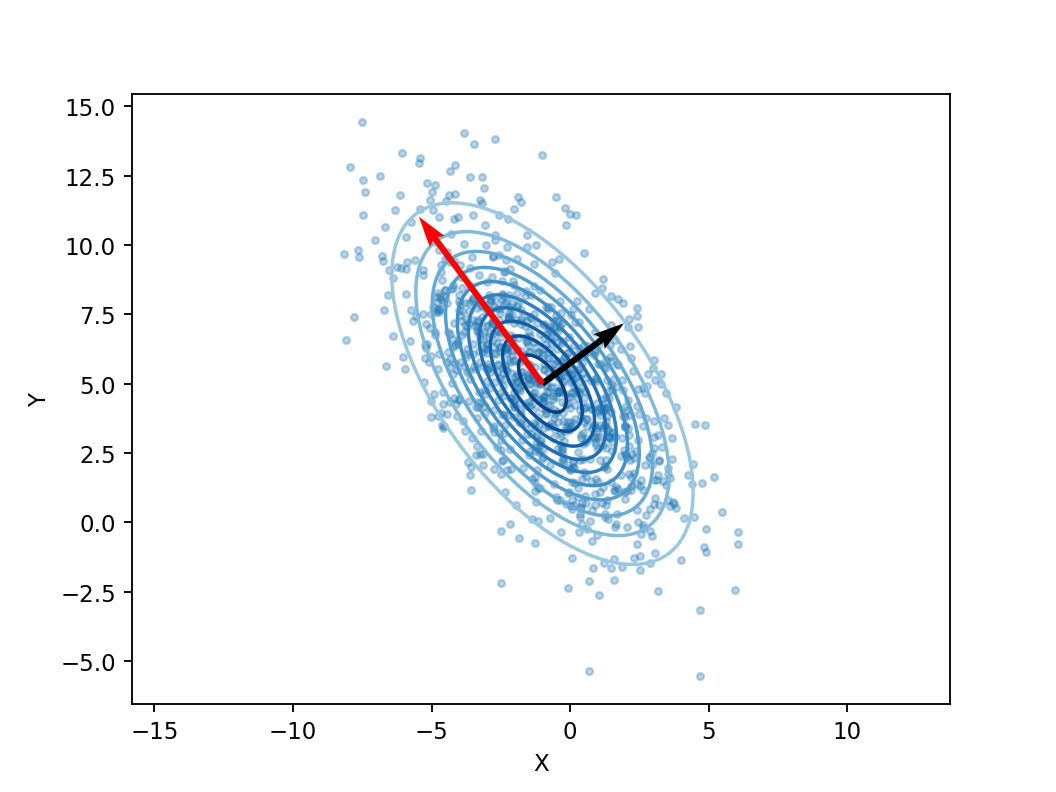

In [15]:
fig, ax = plt.subplots()

coordinate_system = np.eye(2)
origin_point = (mu * np.ones_like(coordinate_system)).T

lines = ax.quiver(
    *origin_point,
    *coordinate_system,
    color=['k', 'r'],
    scale_units='xy', 
    scale=0.15,
    zorder=2
)
_ = ax.axis('equal')
ax.set(
    xlim=(x_min, x_max), 
    ylim=(y_min, y_max),
    xlabel='X', ylabel='Y'
)

ax.plot(X_rnd, Y_rnd, '.', alpha=0.3, zorder=0)
ax.contour(
    X_plot, 
    Y_plot, 
    Z_plot, 
    cmap='Blues', 
    levels=n_levels, 
    vmin=color_intensity_min,
    zorder=1,
)


sqrt_eigenvalues = np.sqrt(eigenvalues)
n_frames = 500
T = 3
t_rotation =  T / 3
t_stretching = 2 * t_rotation
t = np.linspace(0, T, n_frames)


def update(frame):
    # for each frame, update the data stored on each artist.
    if (t[frame] < t_rotation):
        coordinate_system = rotation_matrix_2D(theta * t[frame])
        lines.set_UVC(*coordinate_system)
    elif (t[frame] < t_stretching): 
        fraction = t[frame] / t_rotation - 1.0
        lines.set_UVC(
            *(
                ((1.0 - fraction) + 0.32 * fraction * sqrt_eigenvalues) 
                * rotation_matrix_2D(theta)
            )
        )
    return lines

ani = animation.FuncAnimation(fig=fig, func=update, frames=n_frames, interval=1)

### Cholesky descomposition

A symmetric positive-definite matrix can be decomposed as
$$
\boldsymbol{\Sigma} = \mathbf{L} \mathbf{L}^{\top},
$$
where $\mathbf{L}$ is a lower-triangular matrix (that is, it has zeros above its diagonal).

One of the applications of this decomposition is to generate multivariate normal random vectors whose distribution is $\mathbf{X} \sim N\left(\boldsymbol{\mu}, \boldsymbol{\Sigma}\right)$ (correlated components) from multivariate normal random vectors whose distribution is $\mathbf{Z} \sim N\left(\mathbf{0}, \mathbf{I}\right)$ (independent components):
$$
\mathbf{X} = \boldsymbol{\mu} + \mathbf{L} \mathbf{Z}
$$


Consider the symmetric matrix:
[[10.5 -3.3  1. ]
 [-3.3  5.7  2.4]
 [ 1.   2.4  2.9]]

It is positive sefinite (its eigenvalues are larger than zero).
[ 0.8054923   6.10943588 12.18507183]

Its Cholesky decomposition is:
[[ 3.24037035  0.          0.        ]
 [-1.01840211  2.15936499  0.        ]
 [ 0.3086067   1.25698329  1.10668645]]

Use the Cholesky decomposition generate multivariate normal random vectors with independent components


<IPython.core.display.Latex object>

<IPython.core.display.Javascript object>


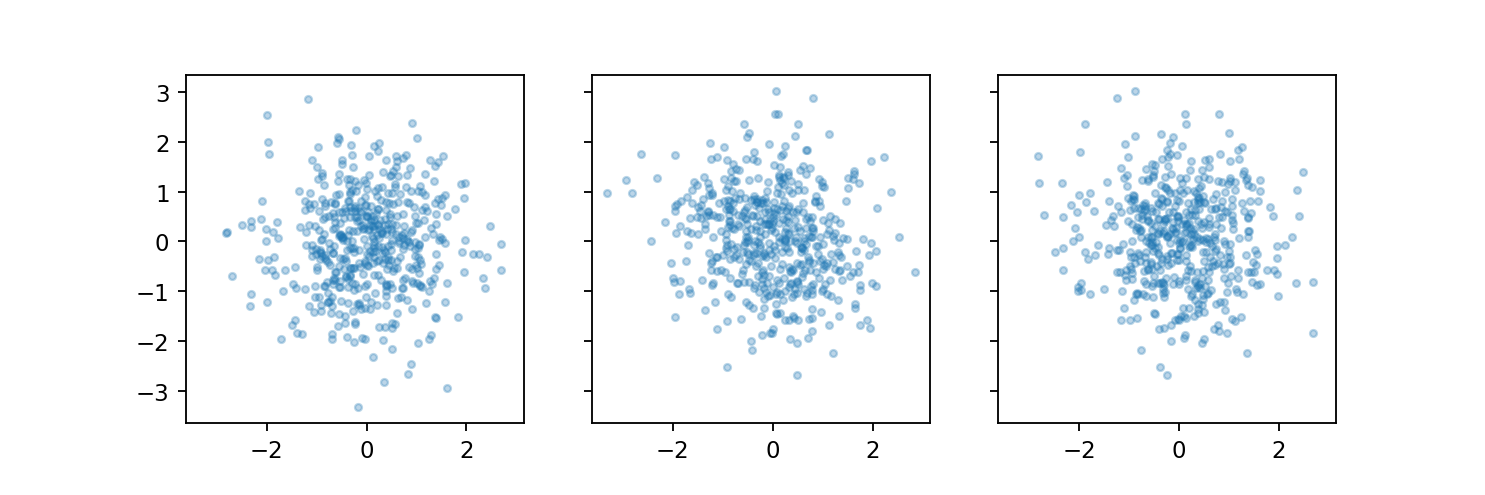

<IPython.core.display.Latex object>

<IPython.core.display.Javascript object>


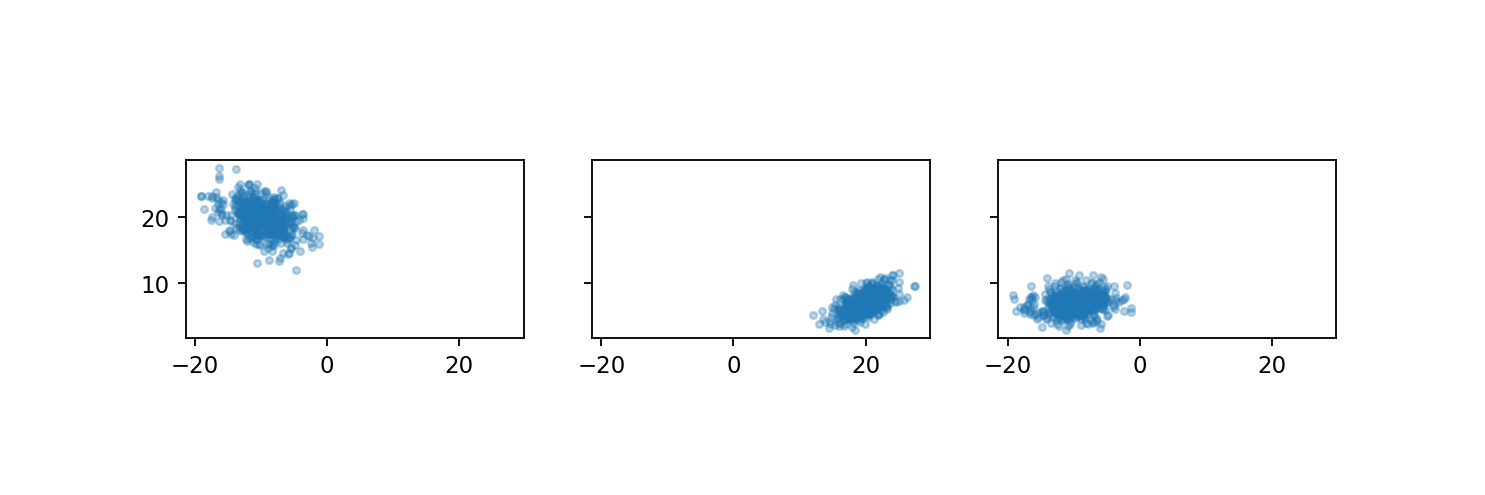

In [16]:
print('Consider the symmetric matrix:')

Sigma = np.array(
    [[ 10.5, -3.3, 1.0],
     [ -3.3,  5.7, 2.4],
     [  1.0,  2.4, 2.9]]
)

print(Sigma)


print('\nIt is positive sefinite (its eigenvalues are larger than zero).')

eigenvalues, _ = np.linalg.eigh(Sigma)
print(eigenvalues)

print('\nIts Cholesky decomposition is:')
L = np.linalg.cholesky(Sigma)
print(L)

print('\nUse the Cholesky decomposition generate multivariate normal random vectors with independent components')
n_samples = 500
mu = np.array([-10.0, 20.0, 7.0])
dimension = len(mu)
rng = np.random.default_rng()

Z = rng.multivariate_normal(
    np.zeros(dimension), 
    np.eye(dimension), 
    n_samples
)

X = mu + Z @ L.T


display(Latex(r'$\mathbf{Z} \sim N\left(\mathbf{0}, \mathbf{I}\right)$'))

fig, axs = plt.subplots(1, 3, figsize = (9, 3), sharex=True, sharey=True)
axs[0].scatter(Z[:, 0], Z[:, 1], marker='.', alpha=0.3)
axs[0].set_aspect('equal')
axs[1].scatter(Z[:, 1], Z[:, 2], marker='.', alpha=0.3)
axs[1].set_aspect('equal')
axs[2].scatter(Z[:, 0], Z[:, 2], marker='.', alpha=0.3)
axs[2].set_aspect('equal')

display(Latex(r'$\mathbf{X} \sim N\left(\boldsymbol{\mu}, \boldsymbol{\Sigma}\right)$'))
fig, axs = plt.subplots(1, 3, figsize = (9, 3), sharex=True, sharey=True)
axs[0].scatter(X[:, 0], X[:, 1], marker='.', alpha=0.3)
axs[0].set_aspect('equal')
axs[1].scatter(X[:, 1], X[:, 2], marker='.', alpha=0.3)
axs[1].set_aspect('equal')
axs[2].scatter(X[:, 0], X[:, 2], marker='.', alpha=0.3)
axs[2].set_aspect('equal')




# Exercises

1. Complete the code of the function `random_Fourier_features` so that the example in this notebook works as illustrated with dephased-cosine features. The expression of these types of random Fourier features is given in Eq.(15) of reference https://gregorygundersen.com/blog/2019/12/23/random-fourier-features/

2. Complete the code of the function `polynomial features` so that one can construct polynomial features for cases in which the instances are characterized by 2 or more attributes. For instance, if the $n$-th example is characterized by the vector of attributes 
$$
\mathbf{x_n}^{\top} = \left(x_{n1}, x_{n2} \right),
$$
a polynomial embedding of degree 3 yields the feature vector 
$$
\left(x_{n1}, x_{n2}, x_{n1}^2, x_{n1} x_{n2}, x_{n2}^2, x_{n1}^3, x_{n1}^2 x_{n2}, x_{n1} x_{n2}^2, x_{n2}^3 \right).
$$

3. Define three different matrix norms. Discuss and compare their properties. Illustrate their use in different applications (one per norm).

4. Explain briefly what is the LU decomposition of a matrix. Illustrate its application with an example.

5. Explain briefly what is the Gram-Schmidt orthogonalization of a set of vectors. Illustrate it obtaining an orthogonal basis for the eigenvectors of the matrix
$$
\left(
\begin{array}{cc}
    2.0 & -1.0 \\ 
    5.0 & -7.0
\end{array}
\right)
$$
Make a plot of the eigenvectors using `quiver` to illustrate their orthogonality.

6. Explain briefly what is the QR decomposition of a matrix. Illustrate its application with an example.

7. Singular value decomposition (SVD)
    1. Give a brief description of SVD.
    2. Assume that matrix $A$ does not have full rank; that is, $A$ is $N \times M$ and $rank(A) = r < min(N, M)$. Explain how to compute the pseudoinverse  (Moore–Penrose inverse) of $A$ from the singular value decomposition.
    3. Explain of how to use Singular Value Decomposition to compress an image (https://dmicz.github.io/machine-learning/svd-image-compression/). Illustrate the procedure with the Cameraman image (https://www.researchgate.net/figure/Original-cameraman-image_fig3_311456031).

8. Mahalanobis distance and whitening transformations.
    1. Define the Mahalanobis distance. Illustrate its use in an application. 
    2. Explain what is a whitening transformation. Illustrate the transformation with a simple example.
    3. How would one use the whitening transformation to compute the Mahalanobis distance?
    4. How would one use a whitening transformation to compute the pdf of a multivariate normal? Modify the code of the function `multivariate_normal_pdf` so that the pdf is computed using a whitening transformation. 1. Mahalanobis distance and whitening transformations.
    1. Define the Mahalanobis distance. Illustrate its use in an application. 
    2. Explain what is a whitening transformation. Illustrate the transformation with a simple example.
    3. How would one use the whitening transformation to compute the Mahalanobis distance?
    4. How would one use a whitening transformation to compute the pdf of a multivariate normal? Modify the code of the function `multivariate_normal_pdf` so that the pdf is computed using a whitening transformation. 

9. Explain briefly the PageRank algorithm (https://verso.mat.uam.es/~pablo.fernandez/google_ems_english.pdf). How does one build the matrix on which the algorithm is based? What role do eigenvalues and eigenvectors play? Provide a simple illustrative example of the algorithm.

10. Explain briefly how to use matrix factorization to build a recommender system. In particular, what is collaborative filtering? What does "filtering" mean in this context? What does "colaborative" mean in this context? Y. Koren, R. Bell and C. Volinsky, "Matrix Factorization Techniques for Recommender Systems," in Computer, vol. 42, no. 8, pp. 30-37, Aug. 2009, https://doi.org/10.1109/MC.2009.263. (access with UAM VPN).

11. Graph eigenvalues
    1. Define the eigenvalues of a graph.
    2. Explain what is the adjacency matrix of a graph. Illustrate how can one use the adjacency matrix to compute the number of paths between any two nodes in the graph.
    4. Explain what is the Laplacian matrix of a graph.
    5. Explain the meaning of the eigenvalues and eigenvectors of a graph. Illustrate with an example of a graph how spectral analysis can be used to quantify the centrality of nodes in the graph.
    6. What do the Fiedler value and the Fiedler vector of a graph represent? 
    7. Explain how to build a weighted graph to reprsent a social network. Illustrate with a simple example how can the spectrum of a weighted-graph be used to find communities in a social network X. 
    
